In [18]:
### Explore what can be told from twitter data ###
### Programmer: Dan Qin ###
### Date: 27.05.2018    ###

# This code is an early exploratory analysis of twitter data retrieved by GetOldTweets package
# data is retrieved using "London night" as query word, time period from Jan 1st to Jan 31st,2015
# inspired by: https://www.kaggle.com/zoupet/wordcloud-time-series-cluster-modelisation/notebook
# versions of libraries used in the code are printed at the end

# import libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
# load data
tweets2015 = pd.read_csv('LondonNight_150101_150131.csv')
tweets2015.head()

,username,date,retweets,favorites,text,geo,mentions,hashtags,id,permalink,Unnamed: 10
0,NaN,2015/1/30 23:59,0,0,Nice to meet Jonathan Night! Look for the new ...,NaN,NaN,# #,5.613129e+17,https://twitter.com/nightangel38506/status/561...,NaN
1,NaN,2015/1/30 23:59,0,0,Nice to meet Jonathan Night! Look for the new ...,NaN,NaN,# #,5.613128e+17,https://twitter.com/c31413/status/561312821862...,NaN
2,NaN,2015/1/30 23:58,0,2,Curry and early night (ish) London in the morning,NaN,NaN,NaN,5.613124e+17,https://twitter.com/BenEFC95/status/5613124436...,NaN
3,NaN,2015/1/30 23:57,6,1,London fog latte & # amreading The Stonecutter...,NaN,NaN,# #3,5.613123e+17,https://twitter.com/BWitzenhausen/status/56131...,NaN
4,NaN,2015/1/30 23:56,0,0,Nice to meet Jonathan Night! Look for the new ...,NaN,NaN,# #,5.613120e+17,https://twitter.com/SHajdila/status/5613119547...,NaN


In [20]:
### BASIC STATISTICS ###
# number of tweets
tweets2015.count()

username           0
date           51005
retweets       51005
favorites      51005
text           51005
geo               41
mentions       13196
hashtags       33002
id             50964
permalink      50979
Unnamed: 10       15
dtype: int64

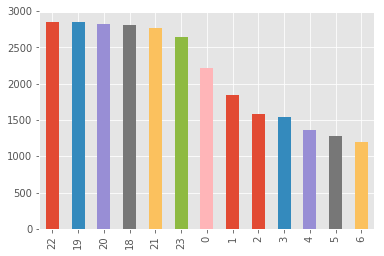

In [21]:
# convert the datetime
tweets2015['date'] = pd.to_datetime(tweets2015['date'])
tweets2015['hour'] = tweets2015['date'].apply(lambda x:x.hour)

# extract tweets from 18:00 to 6:00
tweets2015_night = tweets2015.loc[(tweets2015.hour < 7)|(tweets2015.hour > 17)]

# plot it
tweets2015_night.hour.value_counts().plot(kind = 'bar')

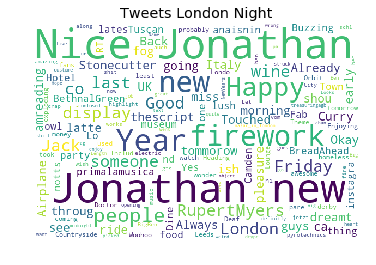

In [22]:
### KEY WORDS EXTRACTION ###
from wordcloud import WordCloud, STOPWORDS

def TWTwordcloud(tweets):
    stopwords = set(STOPWORDS)
    stopwords.add("London")
    stopwords.add("night")
    stopwords.add("https")
    stopwords.add("look")
    stopwords.add("meet")

    wordcloud = WordCloud(
        background_color="white",
        stopwords=stopwords,
        width = 600,
        height = 400,
        random_state = 200).generate(str(tweets['text']))
    
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title("Tweets London Night")

TWTwordcloud(tweets2015) 

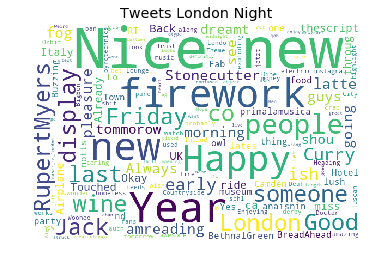

In [23]:
# "Jonathan" seems to refer to a mobile game ad.
# Take it out and check the results again
def TWTwordcloud(tweets):
    stopwords = set(STOPWORDS)
    stopwords.add("London")
    stopwords.add("night")
    stopwords.add("https")
    stopwords.add("look")
    stopwords.add("meet")
    stopwords.add("Jonathan")

    wordcloud = WordCloud(
        background_color="white",
        stopwords=stopwords,
        width = 600,
        height = 400,
        random_state = 200).generate(str(tweets['text']))
    
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title("Tweets London Night")

TWTwordcloud(tweets2015) 

In [24]:
### TEMPORAL VARIANCE ###
# count the number of tweets by 10min
tweets2015_night_temp = tweets2015_night.set_index('date')
tweets2015_volume = tweets2015_night_temp.resample('10T').count()
tweets2015_volume.tail()

,username,retweets,favorites,text,geo,mentions,hashtags,id,permalink,Unnamed: 10,hour
date,,,,,,,,,,,
2015-01-30 23:10:00,0,19,19,19,0,5,11,19,19,0,19
2015-01-30 23:20:00,0,16,16,16,0,6,7,16,16,0,16
2015-01-30 23:30:00,0,15,15,15,0,2,10,15,15,0,15
2015-01-30 23:40:00,0,14,14,14,0,4,9,14,14,0,14
2015-01-30 23:50:00,0,15,15,15,0,2,10,15,15,0,15


Text(0.5,1,'number of tweets by minute(at night)')

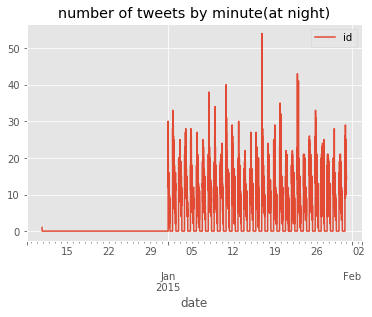

In [25]:
# plot it
tweets2015_volume.plot(y = 'id')
plt.title('number of tweets by minute(at night)')

In [26]:
### SENTIMENT ANALYSIS ###
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *

from nltk import tokenize

sid = SentimentIntensityAnalyzer()

tweets2015['sentiment_compound_polarity']=tweets2015.text.apply(lambda x:sid.polarity_scores(x)['compound'])
tweets2015['sentiment_neutral']=tweets2015.text.apply(lambda x:sid.polarity_scores(x)['neu'])
tweets2015['sentiment_negative']=tweets2015.text.apply(lambda x:sid.polarity_scores(x)['neg'])
tweets2015['sentiment_pos']=tweets2015.text.apply(lambda x:sid.polarity_scores(x)['pos'])
tweets2015['sentiment_type']=''
tweets2015.loc[tweets2015.sentiment_compound_polarity>0,'sentiment_type']='POSITIVE'
tweets2015.loc[tweets2015.sentiment_compound_polarity==0,'sentiment_type']='NEUTRAL'
tweets2015.loc[tweets2015.sentiment_compound_polarity<0,'sentiment_type']='NEGATIVE'
tweets2015.head()

,username,date,retweets,favorites,text,geo,mentions,hashtags,id,permalink,Unnamed: 10,hour,sentiment_compound_polarity,sentiment_neutral,sentiment_negative,sentiment_pos,sentiment_type
0,NaN,2015-01-30 23:59:00,0,0,Nice to meet Jonathan Night! Look for the new ...,NaN,NaN,# #,5.613129e+17,https://twitter.com/nightangel38506/status/561...,NaN,23,0.5242,0.834,0.0,0.166,POSITIVE
1,NaN,2015-01-30 23:59:00,0,0,Nice to meet Jonathan Night! Look for the new ...,NaN,NaN,# #,5.613128e+17,https://twitter.com/c31413/status/561312821862...,NaN,23,0.5242,0.834,0.0,0.166,POSITIVE
2,NaN,2015-01-30 23:58:00,0,2,Curry and early night (ish) London in the morning,NaN,NaN,NaN,5.613124e+17,https://twitter.com/BenEFC95/status/5613124436...,NaN,23,0.0000,1.000,0.0,0.000,NEUTRAL
3,NaN,2015-01-30 23:57:00,6,1,London fog latte & # amreading The Stonecutter...,NaN,NaN,# #3,5.613123e+17,https://twitter.com/BWitzenhausen/status/56131...,NaN,23,0.7815,0.671,0.0,0.329,POSITIVE
4,NaN,2015-01-30 23:56:00,0,0,Nice to meet Jonathan Night! Look for the new ...,NaN,NaN,# #,5.613120e+17,https://twitter.com/SHajdila/status/5613119547...,NaN,23,0.5242,0.834,0.0,0.166,POSITIVE


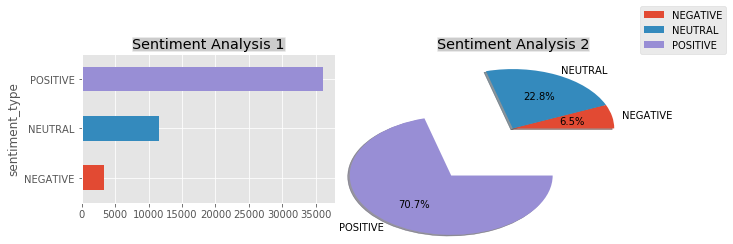

In [28]:
# plot the sentiment analysis
import matplotlib
matplotlib.style.use('ggplot')

tweets2015_sentiment = tweets2015.groupby(['sentiment_type'])['sentiment_neutral'].count()
tweets2015_sentiment.rename("",inplace=True)
explode = (0, 0, 1.0)
plt.subplot(221)
tweets2015_sentiment.transpose().plot(kind='barh',figsize=(10, 6))
plt.title('Sentiment Analysis 1', bbox={'facecolor':'0.8', 'pad':0})
plt.subplot(222)
tweets2015_sentiment.plot(kind='pie',figsize=(10, 6),autopct='%1.1f%%',shadow=True,explode=explode)
plt.legend(bbox_to_anchor=(1, 1), loc=3, borderaxespad=0.)
plt.title('Sentiment Analysis 2', bbox={'facecolor':'0.8', 'pad':0})
plt.show()

Text(0.5,1,"Evolution of tweets' sentiments by hour")

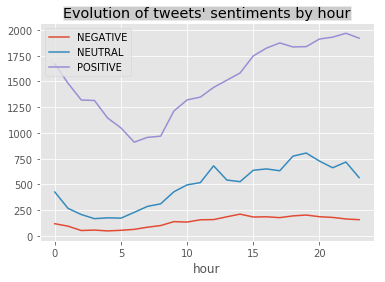

In [29]:
# sentiment variance by time
tweets2015['count'] = 1
tweets2015_filtered = tweets2015[['hour', 'sentiment_type', 'count']]
pivot_tweets2015 = tweets2015_filtered.pivot_table(tweets2015_filtered, index=["sentiment_type", "hour"], aggfunc=np.sum)

sentiment_type = pivot_tweets2015.index.get_level_values(0).unique()
#f, ax = plt.subplots(2, 1, figsize=(8, 10))
plt.plot( xticks=list(range(0,24)))

for sentiment_type in sentiment_type:
    split = pivot_tweets2015.xs(sentiment_type)
    split["count"].plot( legend=True, label='' + str(sentiment_type))
plt.title("Evolution of tweets' sentiments by hour", bbox={'facecolor':'0.8', 'pad':0})  

In [32]:
### CLUSTERING ###
# clustering algorithms 
# from http://ahmedbesbes.com/how-to-mine-newsfeed-data-and-extract-interactive-insights-in-python.html

pd.options.mode.chained_assignment = None
# nltk for nlp
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
# list of stopwords like articles, preposition
stop = set(stopwords.words('english'))
from string import punctuation
from collections import Counter

def tokenizer(text):
    try:
        tokens_ = [word_tokenize(sent) for sent in sent_tokenize(text)]
        
        tokens = []
        for token_by_sent in tokens_:
            tokens += token_by_sent

        tokens = list(filter(lambda t: t.lower() not in stop, tokens))
        tokens = list(filter(lambda t: t not in punctuation, tokens))
        tokens = list(filter(lambda t: t not in [u"'s", u"n't", u"...", u"''", u'``', u'amp', u'https',
                                                u'via', u"'re"], tokens))
        filtered_tokens = []
        for token in tokens:
            if re.search('[a-zA-Z]', token):
                filtered_tokens.append(token)

        filtered_tokens = list(map(lambda token: token.lower(), filtered_tokens))

        return filtered_tokens
    except Error as e:
        print(e)

In [36]:
tweets2015['tokens'] = tweets2015['text'].map(tokenizer)

from sklearn.feature_extraction.text import TfidfVectorizer

# min_df is minimum number of documents that contain a term t
# max_features is maximum number of unique tokens (across documents) that we'd consider

vectorizer = TfidfVectorizer(min_df=5, max_features=10000,tokenizer=tokenizer, ngram_range=(1, 2))
vz = vectorizer.fit_transform(list(tweets2015['text']))

from sklearn.cluster import MiniBatchKMeans

num_clusters = 10
kmeans_model = MiniBatchKMeans(n_clusters=num_clusters, init='k-means++', n_init=1, 
                         init_size=1000, batch_size=1000, verbose=False, max_iter=1000)
kmeans = kmeans_model.fit(vz)
kmeans_clusters = kmeans.predict(vz)
kmeans_distances = kmeans.transform(vz)

sorted_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(num_clusters):
    print("Cluster %d:" % i)
    aux = ''
    for j in sorted_centroids[i, :10]:
        aux += terms[j] + ' | '
    print(aux)
    print() 

Cluster 0:
ipad ipadgame | //gigam.es/tw_psalbion ipad | ipadgame | ipad | acquaintances | acquaintances streets | jonathan night | http //gigam.es/tw_psalbion | new acquaintances | //gigam.es/tw_psalbion | 

Cluster 1:
friday | friday night | night | london | back | london weather | pm | weather | evening | back london | 

Cluster 2:
london last | last night | last | fascinatingpics | fascinatingpics london | london | night | zayn | zayn london | niall | 

Cluster 3:
androidgames | android androidgames | //gigam.es/tw_psalbion android | android | new acquaintances | //gigam.es/tw_psalbion | acquaintances streets | acquaintances | meet jonathan | jonathan night | 

Cluster 4:
honey mayfair | course dinner | mayfair sarah_berryman1 | hotel course | dinner wild | sarah_berryman1 | wild honey | honey | win night | vaselineuk | 

Cluster 5:
london night | london | night | night http | http | walk | lights | night lights | views | london iconic | 

Cluster 6:
last | last night | night | lon

In [38]:
# versions of libraries used 
import sys
import matplotlib
import nltk
import wordcloud

print("Python version:{}".format(sys.version))
print("Pandas version:{}".format(pd.__version__))
print("Numpy version:{}".format(np.__version__))
print("matplotlib version:{}".format(matplotlib.__version__))
print("Wordcloud version:{}".format(wordcloud.__version__))
print("Nltk version:{}".format(nltk.__version__))

Python version:3.6.2 (v3.6.2:5fd33b5, Jul  8 2017, 04:57:36) [MSC v.1900 64 bit (AMD64)]
Pandas version:0.22.0
Numpy version:1.14.2
matplotlib version:2.2.2
Wordcloud version:1.4.1
Nltk version:3.3
